# Milestones 2

# 1. Perkenalan

Nama            : Akhdan Azmi

Batch           : FTDS Remote 015

Dataset         : League of Legends Diamond Ranked Game (10 min) from Riot API https://developer.riotgames.com/

Sumber file csv : https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

Objektif        : Prediksi kemenangan ranked game League of Lagends berdasarkan 10 menit awal


# 2. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import joblib
import json

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix,ConfusionMatrixDisplay

# 3. Data Load

In [2]:
data = pd.read_csv('high_diamond_ranked_10min.csv')
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
data.tail()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8
9878,4523772935,1,18,0,1,6,6,5,0,0,...,0,15339,6.8,17379,201,46,-927,58,20.1,1533.9


In [3]:
# membuat copy dari dataset

df = data.copy()
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
# melihat profil data dengan .info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Data terdiri dari 9879 baris dan 40 kolom. 6 kolom bertipe data float dan 36 bertipe data integer

In [5]:
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

Tidak ada missing value

# 4. Exploratory Data Analysis

In [6]:
# Menampilkan statistik deskriptif

df.describe(include= 'all').T

,count,mean,std,min,25%,50%,75%,max
gameId,9879.0,4.500084e+09,2.757328e+07,4.295358e+09,4.483301e+09,4.510920e+09,4.521733e+09,4.527991e+09
blueWins,9879.0,4.990384e-01,5.000244e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blueWardsPlaced,9879.0,2.228829e+01,1.801918e+01,5.000000e+00,1.400000e+01,1.600000e+01,2.000000e+01,2.500000e+02
blueWardsDestroyed,9879.0,2.824881e+00,2.174998e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,2.700000e+01
blueFirstBlood,9879.0,5.048082e-01,5.000022e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blueKills,9879.0,6.183925e+00,3.011028e+00,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,2.200000e+01
blueDeaths,9879.0,6.137666e+00,2.933818e+00,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,2.200000e+01
blueAssists,9879.0,6.645106e+00,4.064520e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,2.900000e+01
blueEliteMonsters,9879.0,5.499544e-01,6.255265e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
blueDragons,9879.0,3.619800e-01,4.805974e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


Terdapat beberapa kolom numerikal yang memiliki nilai max jauh lebih tinggi dari pada nilai 75% data seperti kolom `blueWardsPlaced`, `blueKills`, `blueDeaths` yang nampaknya akan sangat langka bisa terjadi dalam 10 menit pertama game. terdapat dugaan bahwa hal tersebut merupakan outlier yang disebabkan trolling(Player sengaja mati dalam game) atau ada adanya smurf player(player yang sebenarnya memiliki rank jauh lebih tinggi dari pada rank diamond) dalam game. 

In [8]:
# membuat fungsi untuk menampilkan profil persebaran data
def persebaran(data,kolom):
    
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 2, 1)
    plt.hist(data[kolom], histtype='step', bins=25)  
    plt.axvline(data[kolom].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(data[kolom].median(), color='green', linestyle='dashed', linewidth=2)

    #boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[kolom])

    # Menampilkan beberapa statistik deskriptif
    print(' skewness: ' + str(data[kolom].skew()))
    print(' kurtosis: ' + str(data[kolom].kurt()))
    print(' Mean: ' + str(data[kolom].mean()))
    print(' Median: ' + str(data[kolom].median()))
    print(' Min: ' + str(data[kolom].min()))
    print(' Max: ' + str(data[kolom].max()))
    print('persebaran data kolom ',kolom)

    plt.show()

# Membuat fungsi untuk menampilkan keseimbangan data klasifikasi
def keseimbangan (data, kolom):
    print('jumlah kategori pada kolom ',kolom, 'adalah= ',data[kolom].nunique())
    print( 'Jumlah masing2 value =','\n',data[kolom].value_counts())
    data[kolom].value_counts().plot(kind='bar',figsize=(20, 4))
    plt.show()

## Melihat persebaran data kolom numerik

### Informasi tentang ward

 skewness: 4.136352605170157
 kurtosis: 23.439451633760058
 Mean: 22.28828828828829
 Median: 16.0
 Min: 5
 Max: 250
persebaran data kolom  blueWardsPlaced


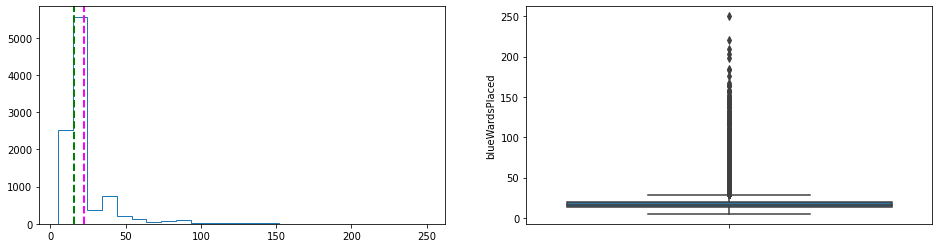

 skewness: 2.845981594146757
 kurtosis: 17.19675844266254
 Mean: 2.824881060836117
 Median: 3.0
 Min: 0
 Max: 27
persebaran data kolom  blueWardsDestroyed


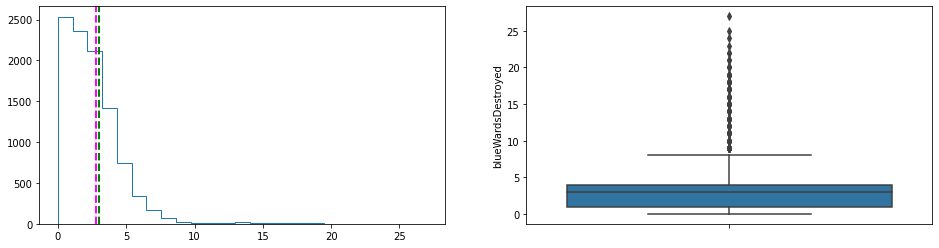

 skewness: 4.560659971028487
 kurtosis: 30.474008264570216
 Mean: 22.367952221884806
 Median: 16.0
 Min: 6
 Max: 276
persebaran data kolom  redWardsPlaced


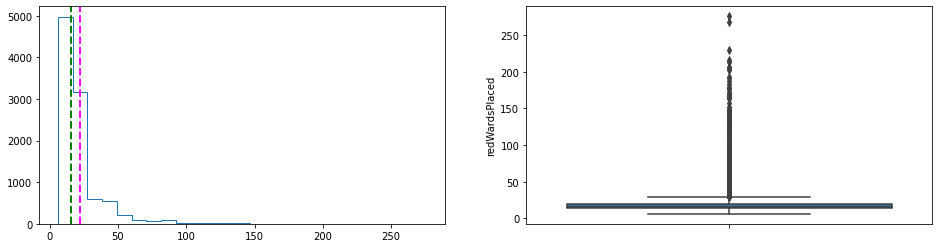

 skewness: 2.949099499012772
 kurtosis: 18.237031256152022
 Mean: 2.723150116408543
 Median: 2.0
 Min: 0
 Max: 24
persebaran data kolom  redWardsDestroyed


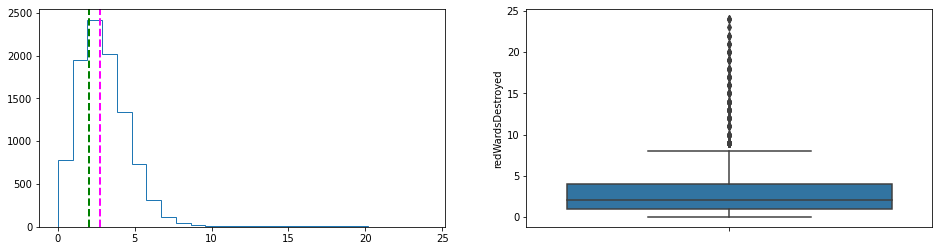

In [10]:
# menggunakan for loop untuk menjalankan fungsi persebaran
for i in ['blueWardsPlaced','blueWardsDestroyed', 'redWardsPlaced', 'redWardsDestroyed']:
    persebaran(df,i)
    print('='*100)

- seluruh kolom bersifat positif skewed dan memiliki outliers

- Kolom `WardsPlaced` baik untuk tim merah maupun tim biru menunjukkan bahwa ward yang terpasang mencapai 250 lebih ward. jumlah tersebut mungkin saja dilakukan dalam waktu 10 menit, namun harus dilakukan dengan skenario game plan yang tidak wajar dan kemungkinan merupakan troll. 

### Informasi tentang KDA (Kill, Death, and Assist)

 skewness: 0.5385175398736033
 kurtosis: 0.26378819752304006
 Mean: 6.18392549853224
 Median: 6.0
 Min: 0
 Max: 22
persebaran data kolom  blueKills


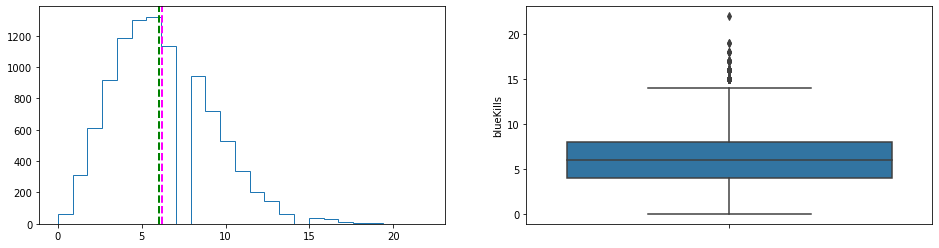

 skewness: 0.5074928207769134
 kurtosis: 0.21409760815246104
 Mean: 6.137665755643284
 Median: 6.0
 Min: 0
 Max: 22
persebaran data kolom  blueDeaths


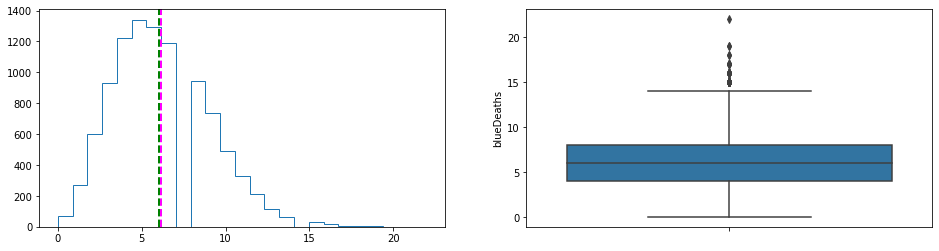

 skewness: 0.8902611921223323
 kurtosis: 1.1591144924086985
 Mean: 6.645105779937241
 Median: 6.0
 Min: 0
 Max: 29
persebaran data kolom  blueAssists


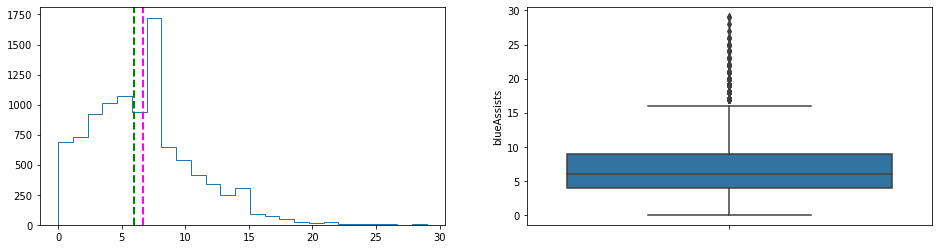

 skewness: 0.5074928207769134
 kurtosis: 0.21409760815246104
 Mean: 6.137665755643284
 Median: 6.0
 Min: 0
 Max: 22
persebaran data kolom  redKills


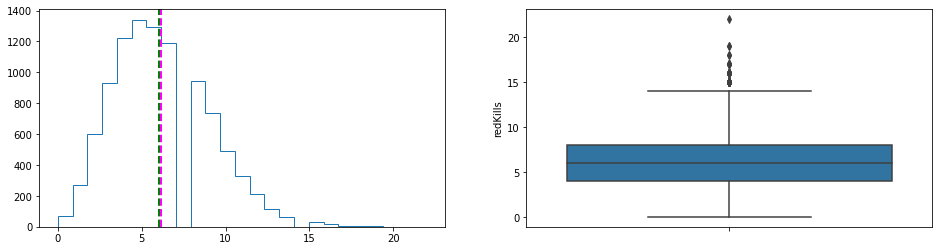

 skewness: 0.5385175398736033
 kurtosis: 0.26378819752304006
 Mean: 6.18392549853224
 Median: 6.0
 Min: 0
 Max: 22
persebaran data kolom  redDeaths


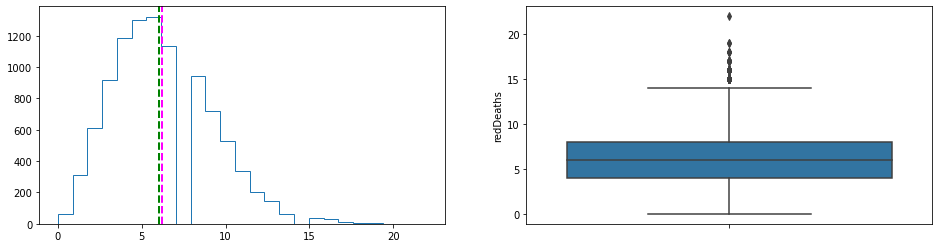

 skewness: 0.8233761136058958
 kurtosis: 0.7854096066152758
 Mean: 6.662111549751999
 Median: 6.0
 Min: 0
 Max: 28
persebaran data kolom  redAssists


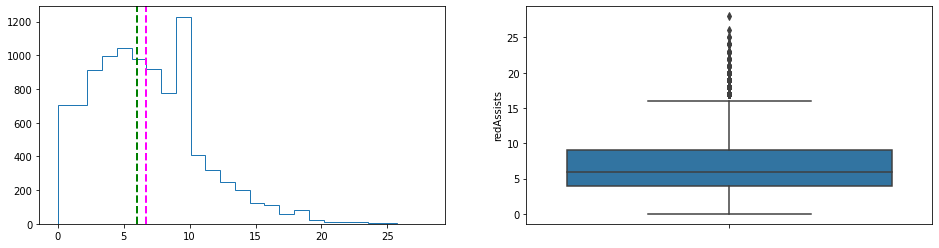

In [11]:
# menggunakan for loop untuk menjalankan fungsi persebaran
for i in ['blueKills', 'blueDeaths', 'blueAssists','redKills', 'redDeaths', 'redAssists']:
    persebaran(df,i)
    print('='*100)

Terlihat bahwa semua kolom memiliki nilai skewness diatas 0.5 dan memiliki outlier. Jumlah max Assist yang didapatkan oleh masing2 tim masih masuk akal. Namun untuk Death dan Kill yang berjumlah lebih dari 15 dalam kurun waktu 10 menit sangat langka untuk terjadi. Hal tersebut dapat terjadi jika terdapat player yang trolling dengan sengaja mati berkali-kali atau terdapat player yang smurfing di diamond tier

### Informasi tentang Elite Monsters dan Tower

 skewness: 0.6920756635409223
 kurtosis: -0.5031257305913388
 Mean: 0.5499544488308533
 Median: 0.0
 Min: 0
 Max: 2
persebaran data kolom  blueEliteMonsters


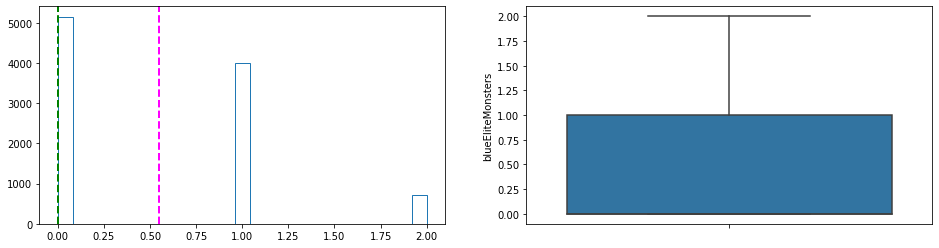

 skewness: 0.5744849809279545
 kurtosis: -1.6703052003727397
 Mean: 0.3619799574855755
 Median: 0.0
 Min: 0
 Max: 1
persebaran data kolom  blueDragons


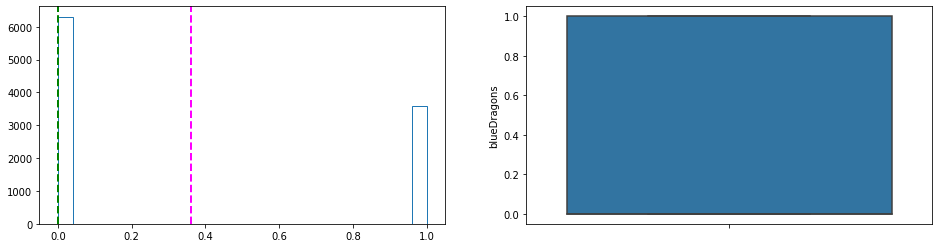

 skewness: 1.5975400332955731
 kurtosis: 0.5522459189821545
 Mean: 0.18797449134527786
 Median: 0.0
 Min: 0
 Max: 1
persebaran data kolom  blueHeralds


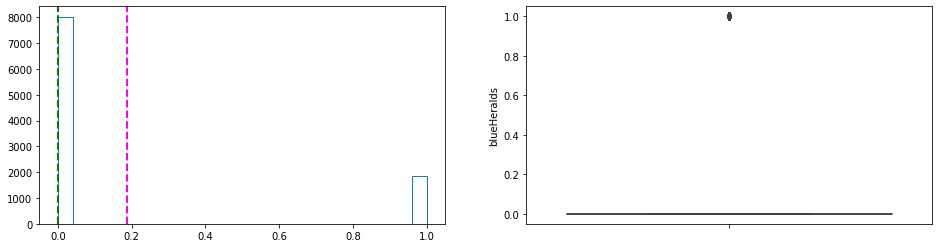

 skewness: 5.590241463974372
 kurtosis: 39.8595957440088
 Mean: 0.05142220872557951
 Median: 0.0
 Min: 0
 Max: 4
persebaran data kolom  blueTowersDestroyed


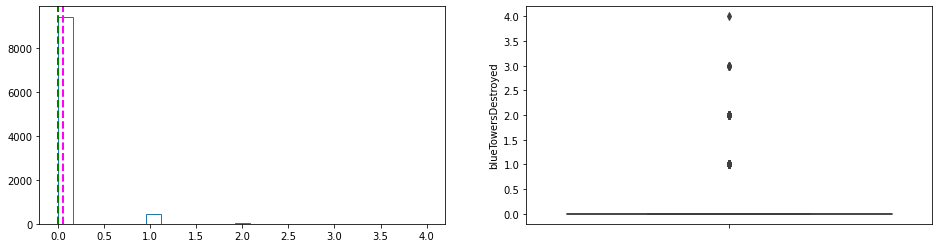

 skewness: 0.6243605126186306
 kurtosis: -0.5683182481705993
 Mean: 0.5731349326854945
 Median: 0.0
 Min: 0
 Max: 2
persebaran data kolom  redEliteMonsters


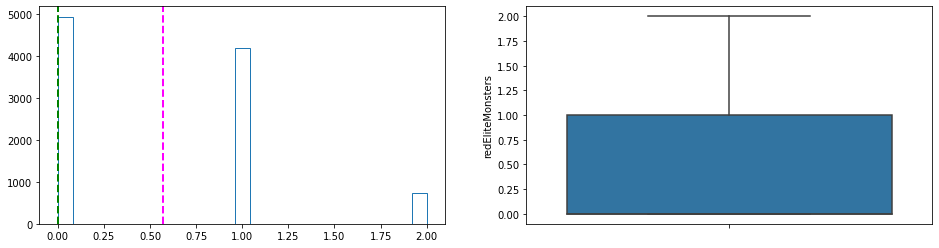

 skewness: 0.35303181226382363
 kurtosis: -1.8757483251018805
 Mean: 0.41309849175017715
 Median: 0.0
 Min: 0
 Max: 1
persebaran data kolom  redDragons


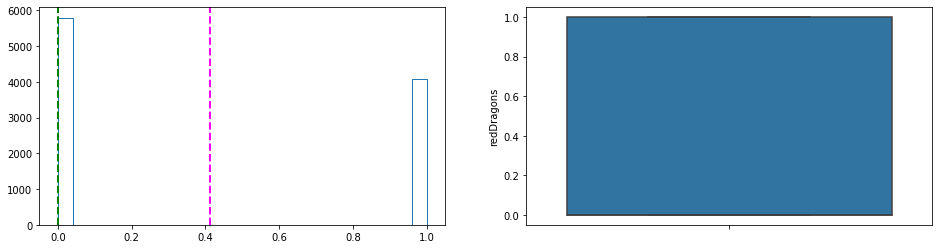

 skewness: 1.8547639575890005
 kurtosis: 1.4404409141326289
 Mean: 0.16003644093531735
 Median: 0.0
 Min: 0
 Max: 1
persebaran data kolom  redHeralds


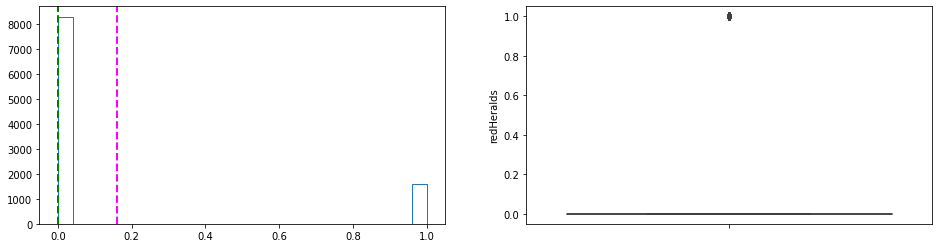

 skewness: 5.340890540659683
 kurtosis: 30.555113287510103
 Mean: 0.04302054863852617
 Median: 0.0
 Min: 0
 Max: 2
persebaran data kolom  redTowersDestroyed


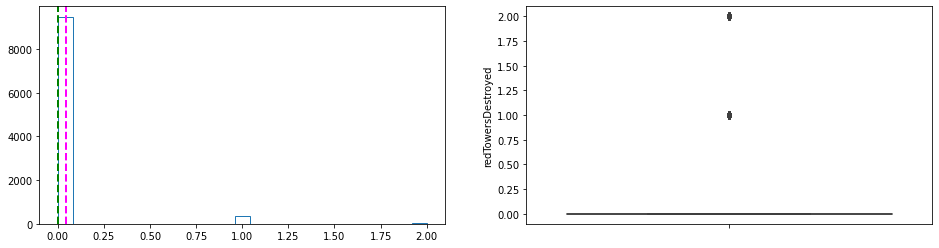

In [12]:
# menggunakan for loop untuk menjalankan fungsi persebaran
for i in ['blueEliteMonsters', 'blueDragons', 'blueHeralds','blueTowersDestroyed','redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed']:
    persebaran(df,i)
    print('='*100)

- Kolom `EliteMonster` merupakan total dari Herald dan Dragon yang berhasil dibunuh oleh satu tim
- Dalam kurun waktu 10 menit awal akan ada 1 herald dan 1 dragon saja yang dapat dibunuh oleh kedua tim. tiap tim harus berebut untuk mendapatkannya. sehingga hal tersebut dapat menjelaskan kenapa `kolom herald dan dragon hanya memiliki nilai 0 dan 1. `
- Kolom `blueTowersDestroyed` memiliki nilai tertinggi 4 yang mana sangat amat jarang terjadi kecuali jika terdapat perbedaan kemampuan antara 2 tim yang cukup jauh. 

### Informasi tentang perolehan Gold

 skewness: 0.468247524526397
 kurtosis: 0.4793115109843882
 Mean: 16503.455511691467
 Median: 16398.0
 Min: 10730
 Max: 23701
persebaran data kolom  blueTotalGold


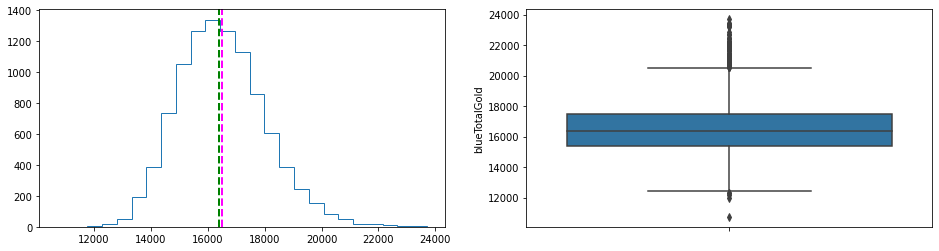

 skewness: -0.267770783914513
 kurtosis: 0.17262236058611302
 Mean: 216.6995647332726
 Median: 218.0
 Min: 90
 Max: 283
persebaran data kolom  blueTotalMinionsKilled


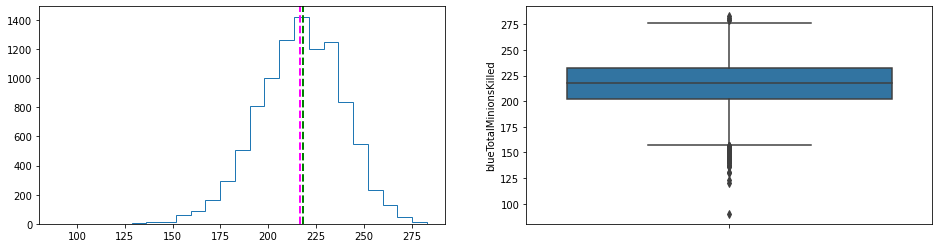

 skewness: 0.030037508762993537
 kurtosis: 0.2994088999784701
 Mean: 14.414110739953436
 Median: 14.0
 Min: -10830
 Max: 11467
persebaran data kolom  blueGoldDiff


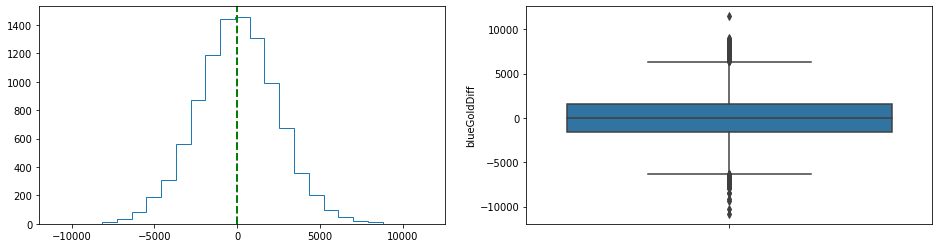

 skewness: 0.4107431598646358
 kurtosis: 0.21900015477871682
 Mean: 16489.04140095151
 Median: 16378.0
 Min: 11212
 Max: 22732
persebaran data kolom  redTotalGold


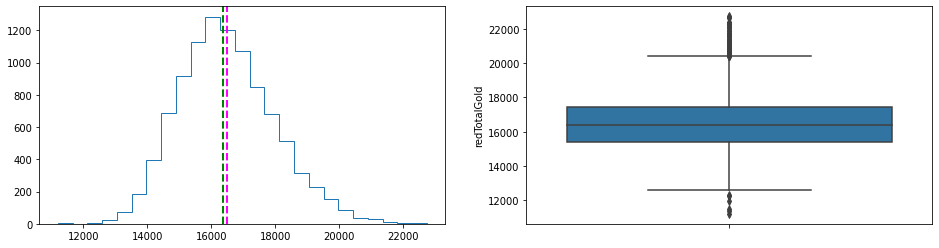

 skewness: -0.28931077419957846
 kurtosis: 0.22670484635553123
 Mean: 217.3492256301245
 Median: 218.0
 Min: 107
 Max: 289
persebaran data kolom  redTotalMinionsKilled


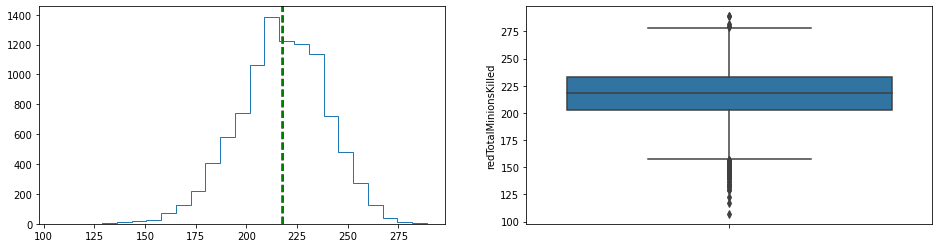

 skewness: -0.030037508762993537
 kurtosis: 0.2994088999784701
 Mean: -14.414110739953436
 Median: -14.0
 Min: -11467
 Max: 10830
persebaran data kolom  redGoldDiff


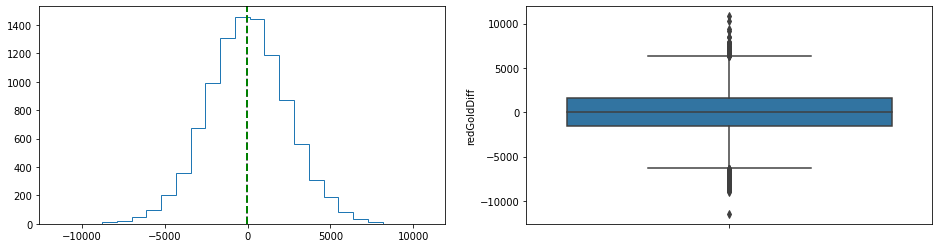

In [13]:
# menggunakan for loop untuk menjalankan fungsi persebaran
for i in ['blueTotalGold', 'blueTotalMinionsKilled', 'blueGoldDiff','redTotalGold', 'redTotalMinionsKilled', 'redGoldDiff']:
    persebaran(df,i)
    print('='*100)

- seluruh kolom cenderung terdistribusi normal meskipun memiliki outliers.
- nilai outlier dari masing-masing kolom merupakan nilai yang mungkin untuk terjadi sehingga dapat disimpulkan bahwa outlier tersebut adalah nilai yang sesungguhnya dan bukan error atau anomali.
- Kolom `GoldDiff` menunjukkan perbedaan jumlah gold yang diperoleh tim. berdasarkna kolom `GoldDiff` terlihat bahwa dalam waktu 10 menit awal game, rata2 dan mayoritas gold score belum dikuasai atau didominasi oleh salah satu tim saja. `Dengan kata lain dalam 10 menit pertama, rata-rata game masih berjalan secara berimbang antara kedua tim. `


### Informasi tentang Experience Poin

 skewness: -0.33850157936730185
 kurtosis: 1.116166722133145
 Mean: 6.916003644093531
 Median: 7.0
 Min: 4.6
 Max: 8.0
persebaran data kolom  blueAvgLevel


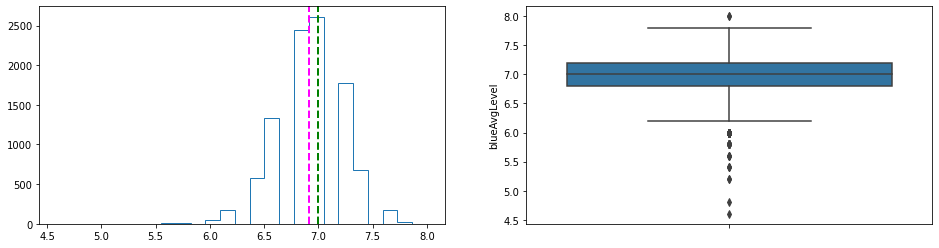

 skewness: -0.24858762638970208
 kurtosis: 0.6803633555611843
 Mean: 17928.110132604514
 Median: 17951.0
 Min: 10098
 Max: 22224
persebaran data kolom  blueTotalExperience


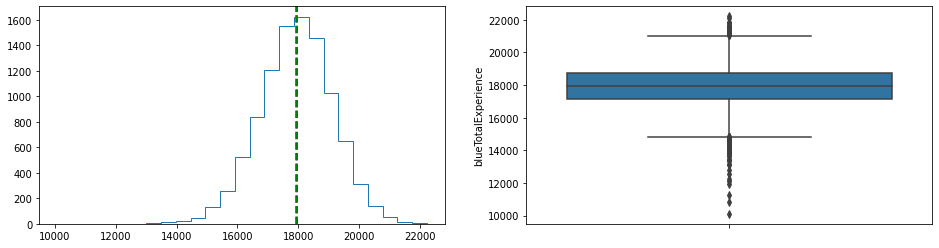

 skewness: 0.11697915617456109
 kurtosis: 0.38532781467056454
 Mean: 50.50966697034113
 Median: 50.0
 Min: 0
 Max: 92
persebaran data kolom  blueTotalJungleMinionsKilled


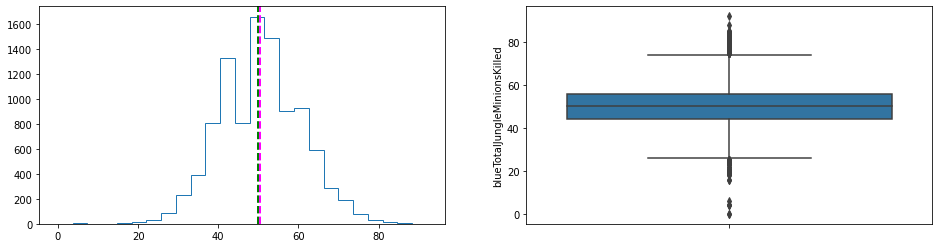

 skewness: 0.02287603634564437
 kurtosis: 0.3648478760867402
 Mean: -33.62030569895738
 Median: -28.0
 Min: -9333
 Max: 8348
persebaran data kolom  blueExperienceDiff


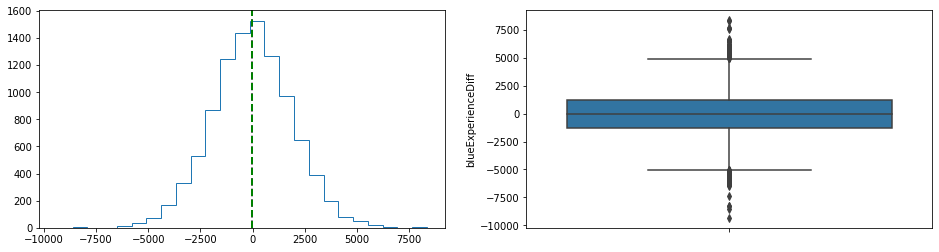

 skewness: -0.3981092713977188
 kurtosis: 1.236949941477877
 Mean: 6.925316327563518
 Median: 7.0
 Min: 4.8
 Max: 8.2
persebaran data kolom  redAvgLevel


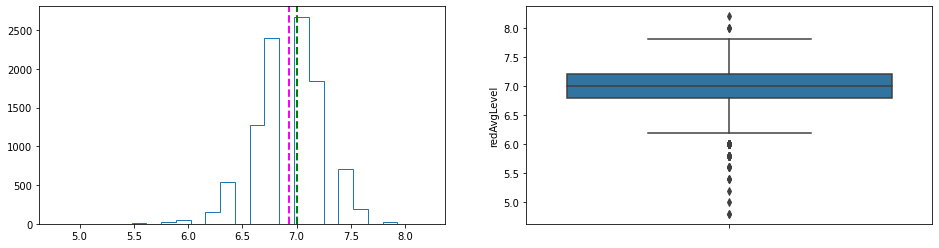

 skewness: -0.28153105151028857
 kurtosis: 0.8169216007448092
 Mean: 17961.73043830347
 Median: 17974.0
 Min: 10465
 Max: 22269
persebaran data kolom  redTotalExperience


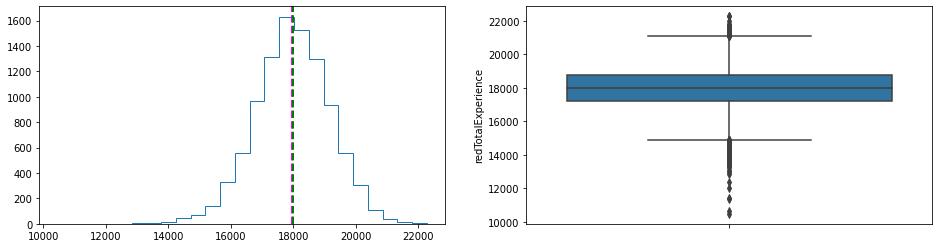

 skewness: 0.2312291686272394
 kurtosis: 0.4156250077768129
 Mean: 51.313088369268144
 Median: 51.0
 Min: 4
 Max: 92
persebaran data kolom  redTotalJungleMinionsKilled


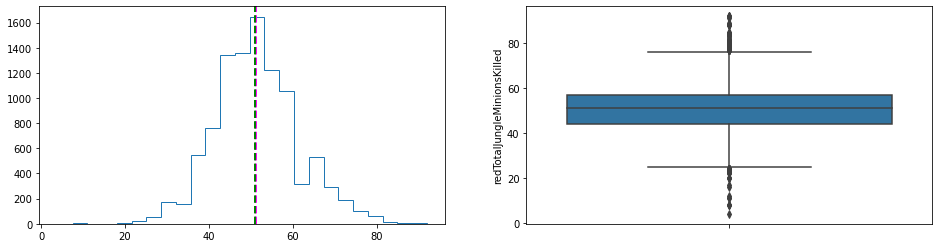

 skewness: -0.02287603634564437
 kurtosis: 0.3648478760867402
 Mean: 33.62030569895738
 Median: 28.0
 Min: -8348
 Max: 9333
persebaran data kolom  redExperienceDiff


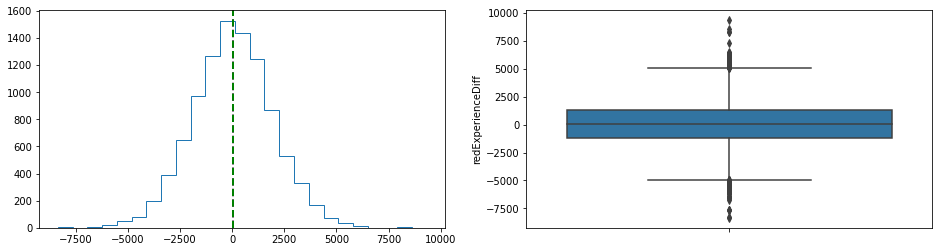

In [14]:
# menggunakan for loop untuk menjalankan fungsi persebaran
for i in ['blueAvgLevel', 'blueTotalExperience', 'blueTotalJungleMinionsKilled','blueExperienceDiff', 'redAvgLevel', 'redTotalExperience', 'redTotalJungleMinionsKilled','redExperienceDiff']:
    persebaran(df,i)
    print('='*100)

- Sebenarnya level champion dalam game bertipe data integer, namun karena yang ditampilkan adalah rata2 seluruh tim maka nilainya bertipe data float
- Terlihat bahwa kolom `AvgLevel` dan `TotalExperience` memiliki pola yang sama dan memuat informasi yang mirip. Hal tersebut terjadi karena untuk menaikkan Level Champion dibutuhkan Exp poin
- Kolom `ExperienceDiff` memiliki pola yang mirip dengan `GoldDiff` yang berarti selama 10 menit, rata-rata game masih berjalan secara berimbang antara kedua tim.

## Melihat keseimbangan data kolom kategori

In [ ]:
# Kolom kategori
kategori= ['blueWins','blueFirstBlood','redFirstBlood']

jumlah kategori pada kolom  blueWins adalah=  2
Jumlah masing2 value = 
 0    4949
1    4930
Name: blueWins, dtype: int64


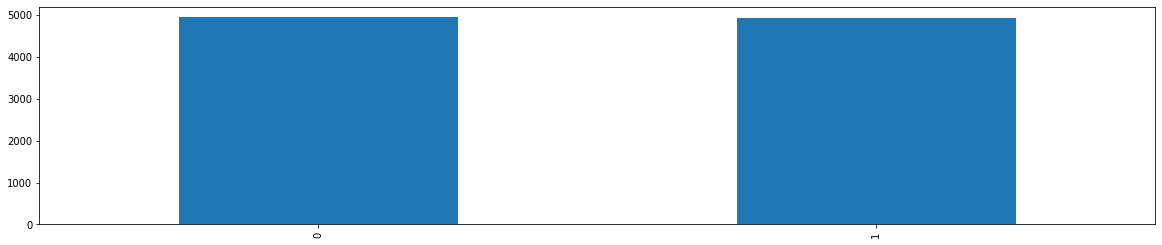

jumlah kategori pada kolom  blueFirstBlood adalah=  2
Jumlah masing2 value = 
 1    4987
0    4892
Name: blueFirstBlood, dtype: int64


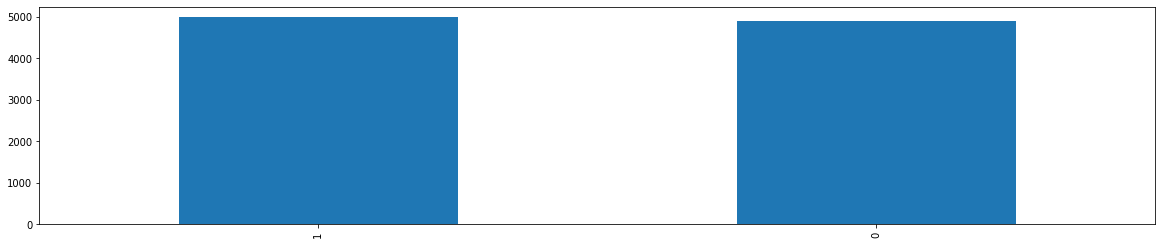

jumlah kategori pada kolom  redFirstBlood adalah=  2
Jumlah masing2 value = 
 0    4987
1    4892
Name: redFirstBlood, dtype: int64


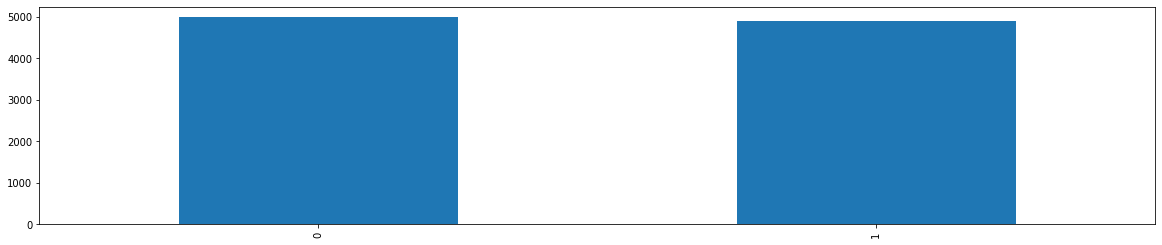

In [15]:
# menggunakan for loop untuk menjalankan fungsi keseimbangan

for i in kategori:
    keseimbangan(df,i)
    print('='*100)

- Data yang dimiliki adalah `data yang balanced` terlihat dari semua kolom termasuk `blueWin` yang akan dijadikan target memiliki jumlah yang mirip diantara kategori nya.
- Kolom `redFirstBlood` merupakan kebalikan dari kolom `blueFirstBlood`. Selain terlihat dari jumlah yang kategori yang berkebalikan satu sama lain, hal tersebut juga sesuai definisi dari First Blood itu sendiri yang berarti Kill pertama yang terjadi dalam game.

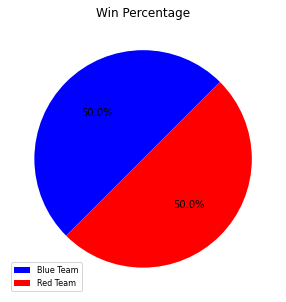

In [16]:
plt.figure(figsize = (5,5))
labels = ['Blue Team', 'Red Team']
sizes = [df['blueWins'].mean(), df['blueWins'].mean()]
colors = ['blue', 'red']

plt.pie(sizes, autopct='%1.1f%%', colors=colors, startangle=45)
plt.title("Win Percentage")
plt.legend(labels=labels, loc=3,prop={'size': 8})
plt.show()

## Apa saja yang mempengaruhi kemenangan??

Unggul `gold poin` dan `experience poin` di 10 menit awal pertandingan akan memberikan efek 'snow ball' yang bisa memberikan kemenangan tim. Ada beberapa hal yang dapat dilakukan oleh tim untuk mendapatkan spesial bonus gold dan experience yang lebih banyak:
- First Blood (Melakukan kill pertama sebuah permainan)
- First Tower (pertama kali menghancurkan tower)
- Membunuh Rift Herald
- Membunuh Dragon

Karena data set tidak memiliki informasi tentang First Tower maka disini tidak bisa dilihat pengaruhnya terhadap kemenangan tim

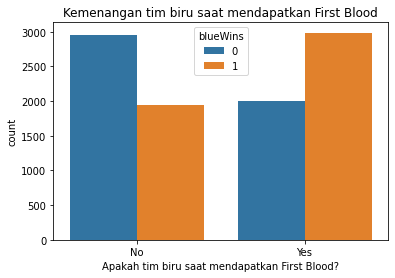

In [16]:
# menampilkan grafik jumlah kemenangan tim biru saat mendapatkan First Blood

sns.countplot(x=df['blueFirstBlood'], hue=df['blueWins'], data=df)

positions = (0,1)
labels = ('No','Yes')
plt.title('Kemenangan tim biru saat mendapatkan First Blood')
plt.xticks(positions,labels)
plt.xlabel('Apakah tim biru saat mendapatkan First Blood?')
plt.show()

Terlihat bahwa jumlah `kemenangan tim biru lebih banyak ketika tim mendapatkan First Blood` dari pada tidak. namun mendapatkan first blood bukan berarti kemenangan mutlak karena masih banyak variable lain.

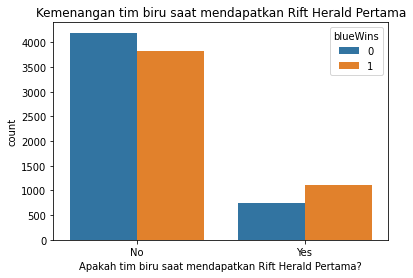

In [17]:
# menampilkan grafik jumlah kemenangan tim biru saat mendapatkan Rift Herald

sns.countplot(x=df['blueHeralds'], hue=df['blueWins'], data=df)

positions = (0,1)
labels = ('No','Yes')
plt.title('Kemenangan tim biru saat mendapatkan Rift Herald Pertama')
plt.xticks(positions,labels)
plt.xlabel('Apakah tim biru saat mendapatkan Rift Herald Pertama?')
plt.show()

Nampaknya meskipun membunuh Rift Herald pertama dapat memberikan Exp dan Gold tambahan serta keunggulan untuk menghancurkan 1 tower, namun itu `bukan menjadi penentu kemenangan` dan justru grafik menunjukkan bahwa `lebih banyak tim yang menang ketika tidak mendapatkan Rift Herald Pertama`. 

Selanjutnya mari kita lihat efek dari mendapatkan First Dragon terhadap kemenangan

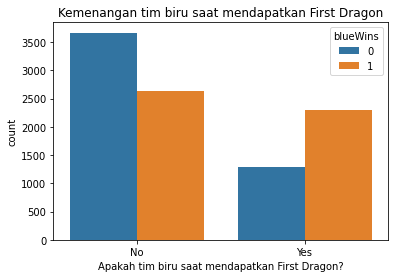

In [18]:
# menampilkan grafik jumlah kemenangan tim biru saat mendapatkan First Dragon

sns.countplot(x=df['blueDragons'], hue=df['blueWins'], data=df)

positions = (0,1)
labels = ('No','Yes')
plt.title('Kemenangan tim biru saat mendapatkan First Dragon')
plt.xticks(positions,labels)
plt.xlabel('Apakah tim biru saat mendapatkan First Dragon?')
plt.show()

Bahkan membunuh dragon pertama dalam 10 menit awal game tidak memberikan jaminan bahwa tim akan unggul, bahkan `lebih banyak tim yang menang ketika tidak mendapatkan Rift Herald Pertama`. 

Kendatipun demikian, tetap dapat disimpulkan bahwa `mendapatkan First Herald atau First Dragon tetap membuat tim tersebut memiliki kemungkinan yang lebih besar untuk menang`. Hal tersebut dapat dilihat dari` perbandingan jumlah menang dan kalah` dari kelompok yang tidak mendapatkan herald/dragon dengan kelompok yang mendapatkan herald/dragon.


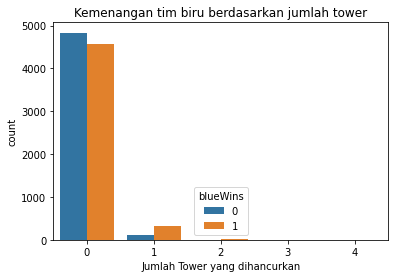

In [19]:
# menampilkan grafik jumlah kemenangan tim biru berdasarkan jumlah Tower yang dihancurkan

sns.countplot(x=df['blueTowersDestroyed'], hue=df['blueWins'], data=df)
plt.title('Kemenangan tim biru berdasarkan jumlah tower')
plt.xlabel('Jumlah Tower yang dihancurkan')
plt.show()

- Terlihat bahwa mayoritas tim belum mendapatkan first tower dalam 10 menit game pertama. 
- Mendapatkan tower jelas memberikan kemungkinan yang lebih besar bagi tim untuk menang 

Selanjutnya mari kita lihat persebaran menang dan kalah berdasarkan total Gold dan total Experience

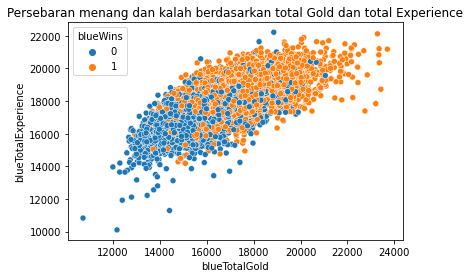

In [20]:
# membuat grafik persebaran 

sns.scatterplot(x=df.blueTotalGold,y=df.blueTotalExperience, hue=df['blueWins'], data=df)
plt.title('Persebaran menang dan kalah berdasarkan total Gold dan total Experience')
plt.show()

- Terlihat bahwa jumlah gold dan experience yang lebih besar pada 10 menit awal dapat membawa kemenangan tim. 
- Beberapa data poin memang memiliki gold dan experience yang lebih rendah, namun dia berhasil memenangkan pertandingan. Begitu juga sebaliknya untuk data poin kalah. Hal tersebut menunjukkan adanya comeback atau tim lawan yang dapat membalikkan keadaan setelah 10 menit awal

# 5. Data Preprocessing

### Membuat data inference

In [21]:
df_inf = df.sample(n= 20, random_state=3)
df_inf.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
6693,4520706902,1,9,2,1,6,7,12,0,0,...,0,17010,7.0,18568,220,67,-480,685,22.0,1701.0
3959,4499662774,1,38,4,1,10,9,18,0,0,...,0,18200,7.0,18163,202,64,-520,-897,20.2,1820.0
4588,4494815274,1,12,0,1,12,6,12,0,0,...,0,16501,6.8,17403,225,48,-2265,-2656,22.5,1650.1
5422,4472652986,0,17,4,0,7,8,6,1,1,...,0,16880,6.8,17522,215,44,873,-308,21.5,1688.0
5593,4510513496,0,15,2,1,8,3,7,0,0,...,0,15420,7.0,17779,241,52,-2683,-1740,24.1,1542.0


In [22]:
# menghilangkan data inference dari dataset utama
df_train_test = df.drop(df_inf.index)

# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

df_train_test.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


### Splitting Feature & Target

kolom `'blueWins'` menjadi target

In [23]:
# Membuat target dan feature
X = df_train_test.drop('blueWins', axis=1)
y = df_train_test['blueWins']


# membuat X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 3,stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (7887, 39)
Test Size  :  (1972, 39)


### Handling Outliers

Disini akan dilakukan handling outlier dengan metode `Turkey Rule`. Metode ini dipilih karena data bersifat skewed. Selanjutnya outlier akan dikeluarkan dari dataset. Hal tersebut karena data set memiliki banyak baris dan yang akan dihilangkan outliernya hanya berasal dari kolom `blueDeaths`, `blueKills`, dan `blueWardsPlaced` karena memuat nilai outlier yang anomali


In [24]:
# membuat dataframe yang akan berisi kolom 'blueDeaths','blueKills', dan 'blueWardsPlaced' tanpa outlier
X_train_new= X_train.drop(columns = ['blueDeaths','blueKills','blueWardsPlaced'])

X_train_new

,gameId,blueWardsDestroyed,blueFirstBlood,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
1740,4525063460,1,1,17,0,0,0,0,18119,6.4,...,0,17379,6.8,16742,210,36,-740,692,21.0,1737.9
2771,4520050863,5,0,5,0,0,0,0,15463,6.4,...,0,19345,7.0,18316,213,40,3882,2253,21.3,1934.5
6623,4501238105,1,1,4,0,0,0,0,16324,7.0,...,0,16654,7.0,18104,213,60,330,-55,21.3,1665.4
1490,4492820318,3,0,16,1,1,0,1,17535,6.4,...,0,16099,6.8,16964,207,66,-1436,1544,20.7,1609.9
1208,4485967051,3,0,3,0,0,0,0,14602,6.8,...,0,16787,7.2,19522,232,76,2185,2480,23.2,1678.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8014,4527434584,16,1,11,1,1,0,0,19052,7.0,...,0,16538,6.6,17023,197,48,-2514,-1416,19.7,1653.8
6219,4526279428,2,0,1,0,0,0,0,13517,6.4,...,0,18855,7.6,20946,243,43,5338,5445,24.3,1885.5
5932,4523056736,3,1,8,0,0,0,0,14451,6.8,...,0,17479,7.4,19784,223,60,3028,3555,22.3,1747.9
3251,4448406532,1,1,4,1,1,0,0,16103,6.8,...,0,16193,7.2,18756,205,37,90,739,20.5,1619.3


In [25]:
# membuat dataframe train_set

train_set = pd.concat([X_train_new,y_train],axis=1)
train_set.shape

(7887, 37)

In [26]:
# membuat list berisi kolom yang akan dihilangkan outliernya
kolom= ['blueDeaths','blueKills','blueWardsPlaced']

# membuat list kosong untuk menampung dataframe baru yang sudah dibersihkan dari outlier
no_outlier=[train_set]

for i in kolom:
    temp= X_train[[i]]
    IQR = temp[i].quantile(0.75) - temp[i].quantile(0.25) # membuat IQR
    upper = temp[i].quantile(0.75)+(IQR*1.5)
    lower = temp[i].quantile(0.25)-(IQR*1.5)
    new= temp[(temp[i] > lower) & (temp[i] < upper)] # seleksi outlier
    no_outlier.append(new)

train_set = pd.concat(no_outlier, axis=1, join='inner') 
train_set

,gameId,blueWardsDestroyed,blueFirstBlood,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,...,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueWins,blueDeaths,blueKills,blueWardsPlaced
1740,4525063460,1,1,17,0,0,0,0,18119,6.4,...,210,36,-740,692,21.0,1737.9,1,8,9,14
6623,4501238105,1,1,4,0,0,0,0,16324,7.0,...,213,60,330,-55,21.3,1665.4,1,7,5,16
1208,4485967051,3,0,3,0,0,0,0,14602,6.8,...,232,76,2185,2480,23.2,1678.7,0,6,2,15
3992,4522573873,8,1,8,0,0,0,0,17569,6.8,...,214,60,-1613,-80,21.4,1595.6,0,6,4,20
2932,4492296802,6,0,8,1,1,0,0,16496,6.8,...,224,68,-1506,169,22.4,1499.0,0,2,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8014,4527434584,16,1,11,1,1,0,0,19052,7.0,...,197,48,-2514,-1416,19.7,1653.8,1,7,10,15
6219,4526279428,2,0,1,0,0,0,0,13517,6.4,...,243,43,5338,5445,24.3,1885.5,0,12,1,13
5932,4523056736,3,1,8,0,0,0,0,14451,6.8,...,223,60,3028,3555,22.3,1747.9,0,8,3,18
3251,4448406532,1,1,4,1,1,0,0,16103,6.8,...,205,37,90,739,20.5,1619.3,0,7,6,14


In [27]:
# memisahkan train set menjadi X_train_new dan y_train_new lagi

X_train_new = train_set.drop('blueWins', axis=1)
y_train_new = train_set['blueWins']

X_train_new.shape

(6372, 39)

### Feature Selection

In [28]:
# Menampilkan kolom X_train_t

X_train_new.columns

Index(['gameId', 'blueWardsDestroyed', 'blueFirstBlood', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'blueDeaths',
       'blueKills', 'blueWardsPlaced'],
      dtype='object')

Disini saya akan fokus pada memprediksi kemenangan blue team sehingga semua kolom tentang red team akan didrop.

In [29]:
X_train_new.drop(list(X_train_new)[17:36], axis=1, inplace= True)
X_train_new.head()


,gameId,blueWardsDestroyed,blueFirstBlood,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,blueDeaths,blueKills,blueWardsPlaced
1740,4525063460,1,1,17,0,0,0,0,18119,6.4,16050,204,38,740,-692,20.4,1811.9,8,9,14
6623,4501238105,1,1,4,0,0,0,0,16324,7.0,18159,231,60,-330,55,23.1,1632.4,7,5,16
1208,4485967051,3,0,3,0,0,0,0,14602,6.8,17042,208,54,-2185,-2480,20.8,1460.2,6,2,15
3992,4522573873,8,1,8,0,0,0,0,17569,6.8,17848,265,40,1613,80,26.5,1756.9,6,4,20
2932,4492296802,6,0,8,1,1,0,0,16496,6.8,18200,251,64,1506,-169,25.1,1649.6,2,5,11


Selanjutnya kolom2 berikut akan di drop:

- `gameId` = karena tidak diperlukan 
- `blueEliteMonsters`= sudah diwakilkan oleh kolom `blueDragons` dan `blueHeralds`
- `blueAvgLevel` dan `blueTotalExperience`= memuat info yang mirip dan sudah diwakilkan oleh `blueTotalGold`
- `blueExperienceDiff`= sudah diwakilkan oleh `blueGoldDiff`

In [30]:
# mendrop kolom2 gameId, blueEliteMonsters, blueAvgLevel, blueTotalExperience ,blueExperienceDiff

X_train_new.drop(['gameId', 'blueEliteMonsters', 'blueAvgLevel', 'blueTotalExperience' ,'blueExperienceDiff'], axis=1, inplace= True)
X_train_new.head()


,blueWardsDestroyed,blueFirstBlood,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueCSPerMin,blueGoldPerMin,blueDeaths,blueKills,blueWardsPlaced
1740,1,1,17,0,0,0,18119,204,38,740,20.4,1811.9,8,9,14
6623,1,1,4,0,0,0,16324,231,60,-330,23.1,1632.4,7,5,16
1208,3,0,3,0,0,0,14602,208,54,-2185,20.8,1460.2,6,2,15
3992,8,1,8,0,0,0,17569,265,40,1613,26.5,1756.9,6,4,20
2932,6,0,8,1,0,0,16496,251,64,1506,25.1,1649.6,2,5,11


In [31]:
# membuat dataframe gabungan X_train_t, y_train untuk membuat heatmap coeficient correlation
df_for_corr= pd.concat([X_train_new, y_train_new], axis=1)


<AxesSubplot:>

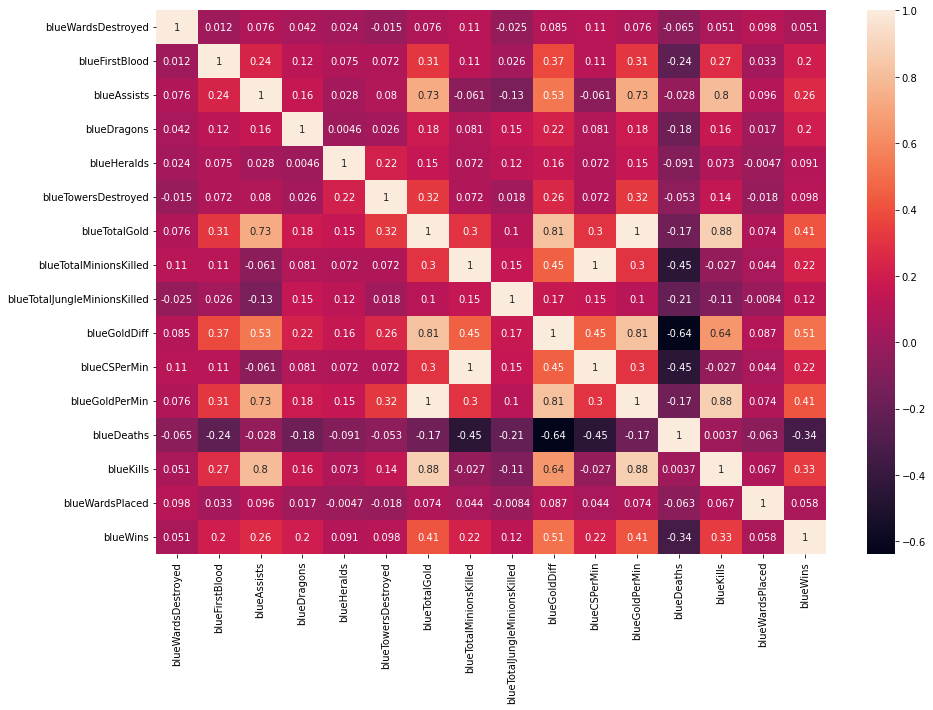

In [32]:
# membuat heatmap koefisien korelasi

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(df_for_corr.corr(), annot= True)

**`Penjelasan`**

Berdasarkan Heatmap diatas akan dipilih kolom2 feature yang tidak berkaitan satu sama lain secara signifikan (independent feature) dan memiliki korelasi yang tinggi dengan target untuk dimasukkan kedalam model. Feature-feature tersebut adalah:

- blueGoldDiff
- blueTotalJungleMinionKilled
- blueTowerDestroyed
- blueDragons
- blueFirstBlood
- blueDeath

### Feature Scaling

In [33]:
num_list =['blueGoldDiff','blueTotalJungleMinionsKilled','blueTowersDestroyed','blueDeaths'] 
cat_list =['blueDragons','blueFirstBlood']

In [34]:
# Membagi train dan test berdasarkan type data dan jenis kolom

# Train Set
X_train_num = X_train_new[num_list]
X_train_cat = X_train_new[cat_list]


# Test Set
X_test_num = X_test[num_list]
X_test_cat = X_test[cat_list]

X_test_cat

,blueDragons,blueFirstBlood
1737,1,1
2695,0,1
9049,1,0
4554,0,0
5260,0,0
...,...,...
1742,0,0
6289,0,0
7256,0,1
3611,0,0


In [35]:
# Scaling kolom numerical dengan MinmaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.59012547, 0.41304348, 0.        , 0.61538462],
       [0.53555034, 0.65217391, 0.        , 0.53846154],
       [0.44093645, 0.58695652, 0.        , 0.46153846],
       ...,
       [0.39793941, 0.40217391, 0.        , 0.61538462],
       [0.54779149, 0.43478261, 0.        , 0.53846154],
       [0.41053759, 0.60869565, 0.        , 0.46153846]])

### Feature Encoding

Tidak perlu dilakukan encoding karena kolom kategorikal sudah ter-encode

### Menggabungkan kembali kolom numerik dan kolom kategorik

In [36]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)
X_train_final

array([[0.59012547, 0.41304348, 0.        , 0.61538462, 0.        ,
        1.        ],
       [0.53555034, 0.65217391, 0.        , 0.53846154, 0.        ,
        1.        ],
       [0.44093645, 0.58695652, 0.        , 0.46153846, 0.        ,
        0.        ],
       ...,
       [0.39793941, 0.40217391, 0.        , 0.61538462, 0.        ,
        1.        ],
       [0.54779149, 0.43478261, 0.        , 0.53846154, 1.        ,
        1.        ],
       [0.41053759, 0.60869565, 0.        , 0.46153846, 0.        ,
        0.        ]])

# 6. Model Definition

Pada tahap ini akan dicoba beberapa model algoritma yakni Logistic Regression, Decision tree, Random Forest, dan XGboost. Masing-masing algoritma akan dilakukan hyperparameter tuning dan dipilih yang terbaik

In [37]:
# Logistic Regression
log_reg = LogisticRegression()

# Decision tree
tree = DecisionTreeClassifier()

# Random Forest
rf = RandomForestClassifier()

# XGboost
xgb = XGBClassifier()

#### Membuat baseline terbaik dari model-model yang dipilih

Selanjutnya akan dilakukan pencarian baseline terbaik dari masing-masing algoritma. Pencarian dilakukan dengan kombinasi gridsearchCV dan Pipeline sehingga dapat dijalankan sekaligus dan langsung mendapatkan hasilnya.

`Metrik yang digunakan untuk perbandingan adalah f1_score` karena kita berusaha untuk mendapatkan Model yang baik dan moderat dalam meminimalisir jumlah False Negative dan False Positive.

In [38]:
# membuat a pipeline
pipe = Pipeline([('classifier', tree)])

# membuat variable cv yang akan dimasukkan menggunakan RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=5, random_state=999)

# Membuat space untuk diisi dengan algoritma2 dengan Hyperparameter default
search_space = [ # Logistic Regression
                {'classifier': [log_reg]},

                # Decision tree
                {'classifier': [tree]},
                 
                 # Random Forest
                {'classifier': [rf]},
                  
                  # XGBoost
                {'classifier': [xgb],}
                ]
                  
# membuat grid search
clf_baseline = GridSearchCV(pipe, search_space, cv=cv_method, scoring='f1', n_jobs=-1,)

In [39]:
%%time
# Fit grid search
best_baseline = clf_baseline.fit(X_train_final, y_train_new)

CPU times: total: 484 ms
Wall time: 8.23 s


In [40]:
# Menampilkan baseline model terbaik

best_baseline.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression())])

**`Baseline terbaik adalah Logistic Regression`**

#### Membuat model terbaik beserta Hyperparameternya

Pada bagian ini akan digunakan kombinasi Pipeline dan GridSearchCV untuk menemukan model terbaik beserta hyperparameternya

In [41]:
# Membuat space untuk diisi dengan algoritma2 dengan Hyperparameter Tuning
search_space_best = [ # Logistic Regression
                {'classifier': [log_reg],
                'classifier__C': [0.1, 0.5, 1],
                'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear']},

                # Decision tree
                {'classifier': [tree],
                "classifier__max_depth": [2, 3, 5], 
                "classifier__max_features": ['auto', 'sqrt'], 
                "classifier__min_samples_leaf": [2, 3, 5],
                "classifier__criterion": ["gini", "entropy"]},
                 
                 # Random Forest
                {'classifier': [rf],
                'classifier__n_estimators': [50,100, 200],
                'classifier__criterion': ['entropy', 'gini'],
                'classifier__max_features': ['auto', 'sqrt'],
                'classifier__max_depth': [2, 3]},
                  
                  # XGBoost
                {'classifier': [xgb],
                'classifier__gamma': [1.0,1.5,2.0],
                'classifier__subsample': [0.6, 0.8, 1.0],
                'classifier__max_depth': [4,5],
                'classifier__n_estimators': [50, 100, 200]}
                ]
                  
# membuat grid search
clf_best = GridSearchCV(pipe, search_space_best,verbose=10, cv=cv_method, scoring='f1')

In [ ]:
%%time
# Fit grid search
best_model = clf_best.fit(X_train_final, y_train_new)

In [43]:
# Menampilkan baseline model terbaik

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('classifier', LogisticRegression(C=1))],
 'verbose': False,
 'classifier': LogisticRegression(C=1),
 'classifier__C': 1,
 'classifier__class_weight': None,
 'classifier__dual': False,
 'classifier__fit_intercept': True,
 'classifier__intercept_scaling': 1,
 'classifier__l1_ratio': None,
 'classifier__max_iter': 100,
 'classifier__multi_class': 'auto',
 'classifier__n_jobs': None,
 'classifier__penalty': 'l2',
 'classifier__random_state': None,
 'classifier__solver': 'lbfgs',
 'classifier__tol': 0.0001,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

**`Model dengan hyperparameter terbaik adalah Logistic Regression dengan Hyperparameter seperti yang terlihat di atas`**

# 7. Model Training



Training Model dengan hyperparameter terbaik yang telah ditentukan berdasarkan GridSearchCV

In [44]:
# Training Baseline
baseline = best_baseline.best_estimator_

# Training Best model 
model_op= best_model.best_estimator_

# 8. Model Evaluation

## Melakukan Prediksi

In [45]:
# Melakukan prediksi dengan baseline
y_pred_train_base = baseline.predict(X_train_final)
y_pred_test_base = baseline.predict(X_test_final)


# Melakukan prediksi dengan model yang telah di optimasi
y_pred_train_op = model_op.predict(X_train_final)
y_pred_test_op = model_op.predict(X_test_final)

## Evaluasi Model dengan classification_report

In [46]:
# Evaluasi pada Train set
print('Train Set')
print(classification_report(y_train_new, y_pred_train_op))
print('='*100)

# Evaluasi pada test set
print('Test Set')
print(classification_report(y_test, y_pred_test_op))

Train Set
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      3197
           1       0.72      0.73      0.72      3175

    accuracy                           0.72      6372
   macro avg       0.72      0.72      0.72      6372
weighted avg       0.72      0.72      0.72      6372

Test Set
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       988
           1       0.73      0.75      0.74       984

    accuracy                           0.74      1972
   macro avg       0.74      0.74      0.74      1972
weighted avg       0.74      0.74      0.74      1972



Berdasarkan 2 tabel di atas terlihat bahwa train set dan test set memiliki nilai f1_score yang tidak terlalu berbeda sehingga dapat disimpulkan bahwa model `tidak overfitting`.  

Kita berusaha mendapatkan model yang dapat memprediksi dengan tepat dan akurat sehingga kita berusaha untuk mendapatkan jumlah False Positive(FP) dan False Negative(FN) yang rendah. Jumlah False Positive yang rendah dapat dilakukan dengan berusaha meningkatkan nilai Precision dan Jumlah False Negative yang rendah dapat dilakukan dengan berusaha meningkatkan nilai Recall. 

Dalam kasus ini, kita tidak mengutamakan untuk menurunkan jumlah FN atau FP saja sehingga metrik yang berusaha untuk ditingkatkan adalah f1-score yang merupakan gabungan keduanya. 

hasil evaluasi dari model untuk test set adalah sebagai berikut
- `precision`: 0.73
- `recall`: 0.75
- `f1-score`: 0.74 

Untuk dapat memahami maksud dari nilai masing2 metrik tersebut,  kita akan melihat Confusion Matrix

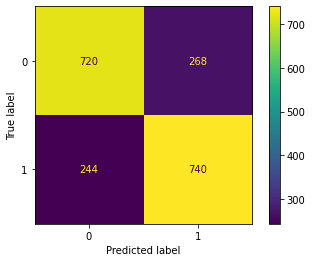

In [47]:
# membuat confusion matrix 
cm = confusion_matrix(y_test, y_pred_test_op, labels=model_op.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model_op.classes_)
disp.plot()

- Terlihat dari confusion marix bahwa jumlah FN adalah 244 yang berarti dari 984 pertandingan yang seharusnya berakhir menang, model menganggap 244 diantaranya akan kalah. kemampuan Model untuk memprediksi True Positif adalah 75%

- Jumlah FP adalah 268 yang berarti dari 988 pertandingan yang seharusnya berakhir kalah, model menganggap 268 diantaranya akan menang. kemampuan Model untuk memprediksi True negative adalah 73%


## Membandingkan Hasil Tuning Hyperparameter dengan Model Baseline

Selanjutnya akan diperlihatkan score evaluasi untuk prediksi test set dari model baseline dan model yang telah dioptimasi

In [48]:
# Print model baseline
print('Model baseline')
print(classification_report(y_test, y_pred_test_base))
print('='*100)


# Print model setelah hyperparameter
print('Model Setelah Hyperparameter')
print(classification_report(y_test, y_pred_test_op))

Model baseline
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       988
           1       0.73      0.75      0.74       984

    accuracy                           0.74      1972
   macro avg       0.74      0.74      0.74      1972
weighted avg       0.74      0.74      0.74      1972

Model Setelah Hyperparameter
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       988
           1       0.73      0.75      0.74       984

    accuracy                           0.74      1972
   macro avg       0.74      0.74      0.74      1972
weighted avg       0.74      0.74      0.74      1972



Terlihat bahwa `optimasi tidak menghasilkan perubahan apapun terhadap precision, recall, maupun f1-score`. Kemungkinan hal tersebut dapat terjadi karena tidak tepatnya range dan kurangnya variasi hyperparameter yang digunakan untuk tuning sehingga tidak menghasilkan apapun. 

In [49]:
# melihat probabilitas prediksi
proba_test = model_op.predict_proba(X_test_final)
proba_test

array([[0.28355762, 0.71644238],
       [0.79191077, 0.20808923],
       [0.10546514, 0.89453486],
       ...,
       [0.72843483, 0.27156517],
       [0.77332142, 0.22667858],
       [0.55828743, 0.44171257]])

# 9. Menyimpan Model

In [50]:
# Menyimpan file

with open('model.pkl', 'wb') as file_1:
  joblib.dump(model_op, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('list_num_cols.txt', 'w') as file_3:
  json.dump(num_list, file_3)

with open('list_cat_columns.txt', 'w') as file_4:
  json.dump(cat_list, file_4)

# 10. Model Inference

Model yang telah dilatih dicoba pada data yang tidak termasuk pada train dan test

In [51]:
# menampilkan data inference

df_inf

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4520706902,1,9,2,1,6,7,12,0,0,...,0,17010,7.0,18568,220,67,-480,685,22.0,1701.0
1,4499662774,1,38,4,1,10,9,18,0,0,...,0,18200,7.0,18163,202,64,-520,-897,20.2,1820.0
2,4494815274,1,12,0,1,12,6,12,0,0,...,0,16501,6.8,17403,225,48,-2265,-2656,22.5,1650.1
3,4472652986,0,17,4,0,7,8,6,1,1,...,0,16880,6.8,17522,215,44,873,-308,21.5,1688.0
4,4510513496,0,15,2,1,8,3,7,0,0,...,0,15420,7.0,17779,241,52,-2683,-1740,24.1,1542.0
5,4504366745,0,24,3,0,6,5,8,0,0,...,0,16583,7.2,18466,239,64,-226,-557,23.9,1658.3
6,4470854778,0,20,5,0,6,3,5,1,0,...,0,15558,6.8,18089,220,51,-2459,-834,22.0,1555.8
7,4508812859,1,19,3,1,4,2,6,2,1,...,0,15781,7.0,18353,229,77,-1449,530,22.9,1578.1
8,4494142673,0,14,3,1,3,3,5,0,0,...,1,17319,7.2,19234,276,52,1930,1452,27.6,1731.9
9,4457117855,1,21,4,1,11,9,13,1,1,...,0,16987,7.0,18105,219,40,-2249,-2480,21.9,1698.7


Berikut ini adalah serangkaian proses penyiapan data inference sebelum dilakukan predict dengan model yang sudah dibuat

In [52]:
# Membagi data inference menjadi numerik, kategori ordinal, dan kategori non-ordinal
df_inf_num = df_inf[num_list]
df_inf_cat = df_inf[cat_list]

# melakukan scaling df_inf
df_inf_num_scaled = scaler.transform(df_inf_num)

# menggabungkan semua kolom ordinal, non-ordinal, dan numerik
df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat], axis=1)

In [53]:
# Predict df_inf dengan model yang telah dipotimasi
y_pred_inf = model_op.predict(df_inf_final)
y_pred_inf

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [54]:
# membuat probabilitas dari prediksi

proba_df = model_op.predict_proba(df_inf_final)

In [55]:
hasil= pd.DataFrame({
    'Win_lose':df_inf.blueWins ,
    'Prediction ':y_pred_inf,
    'Prediction_Win_Probability': proba_df[:,1]
})

hasil

,Win_lose,Prediction,Prediction_Win_Probability
0,1,1,0.530458
1,1,0,0.467219
2,1,1,0.721664
3,0,0,0.434617
4,0,1,0.792873
5,0,1,0.515414
6,0,1,0.755466
7,1,1,0.756836
8,0,0,0.283842
9,1,1,0.796434


# 11. Kesimpulan

**`Berikut merupakan kesimpulan dan saran untuk pengembangan model`**

1. Data set yang memiliki kolom target yang balance sehingga tidak membuat model condong untuk menghasilkan salah satu kategori saja

2. Beberapa kolom merupakan nilai kebalikan dari kolom yang lain. Hal ini terjadi karena tiap row mengandung data baik dari tim biru maupun tim merah

3. Mayoritas game belum menunjukkan adannya dominasi dari salah satu tim pada 10 menit pertama. Perolehan gold dan experience poin cenderung belum condong ke salah satu tim

4. Mendapatkan first elite monster(Dragon dan Herald) memang penting dan bisa membantu untuk menang. Namun berdasarkan data, mendapatkan first elite monster pada 10 menit awal tidak berkontribusi signifikan untuk menang 
karena masih banyaknya sumber gold dan experience lain setelah 10 menit. Sehingga tidak mudah untuk membuat model dengan prediksi yang tepat dan akurat hanya berdasarkan 10 menit awal game. 

5. Jumlah penempatan dan penghancuran `ward` secara mengejutkan ternyata tidak berpengaruh besar terhadap kemenangan. Selama saya memainkan game ini saya berfikir bahwa posisi dan penempatan ward memberikan dampak yang besar untuk kemenangan karena memberikan vision lebih pada map

6. First Kill memberikan dampak yang signifikan untuk dapat memenangkan game. selain karena memberikan bonus gold yang lebih banyak, mendapatkan first kill juga meningkatkan kepercayaan diri tim.

7. Berdasarkan persebaran data menang-kalah vs jumlah gold & exp poin, semakin banyak gold dan experience poin yang diperoleh tim pada 10 menit awal maka semakin besar kemungkinan tim tersebut dapat menang. namun itu tidaklah menjadi jaminan karena data menunjukkan bahwa banyak juga tim yang berhasil membalikkan keadaan setelah 10 menit awal

8. Model baseline yang dibuat memiliki nilai f1-score 0.74 dan tidak mengalami perubahan meskipun sudah dilakukan Hyperparameter Tuning. Hal ini menunjukkan bahwa model masih dapat dikembangkan lagi agar menjadi lebih baik

9. Untuk pengembangan dapat dilakukan perbaikan pada preprocessing untuk menangani outlier dengan lebih tepat lagi. 

10. Perlu dilakukan pemilihan feature yang lebih jeli lagi dan juga penambahan feature2 baru seperti komposisi champion, rune, dan item yang digunakan oleh player

